In [1]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
from matplotlib import ticker
import numpy as np
import pickle

In [2]:
csv_df = pd.read_csv("../groove-v1.0.0/groove/info.csv")
train_df = csv_df[(csv_df.split=="train")]
train_df

,Unnamed: 0,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split,csv_filename
10,10,drummer1,drummer1/session1,drummer1/session1/1,funk,80,beat,4-4,drummer1/session1/1_funk_80_beat_4-4.mid,drummer1/session1/1_funk_80_beat_4-4.wav,86.704688,train,drummer1/session1/1_funk_80_beat_4-4.csv
11,11,drummer1,drummer1/session1,drummer1/session1/10,jazz/funk,116,fill,4-4,drummer1/session1/10_jazz-funk_116_fill_4-4.mid,drummer1/session1/10_jazz-funk_116_fill_4-4.wav,1.872843,train,drummer1/session1/10_jazz-funk_116_fill_4-4.csv
12,12,drummer1,drummer1/session1,drummer1/session1/100,neworleans/secondline,94,beat,4-4,drummer1/session1/100_neworleans-secondline_94...,drummer1/session1/100_neworleans-secondline_94...,135.365719,train,drummer1/session1/100_neworleans-secondline_94...
13,13,drummer1,drummer1/session1,drummer1/session1/101,dance/disco,120,beat,4-4,drummer1/session1/101_dance-disco_120_beat_4-4...,drummer1/session1/101_dance-disco_120_beat_4-4...,207.572917,train,drummer1/session1/101_dance-disco_120_beat_4-4...
14,14,drummer1,drummer1/session1,drummer1/session1/102,funk,95,beat,4-4,drummer1/session1/102_funk_95_beat_4-4.mid,drummer1/session1/102_funk_95_beat_4-4.wav,224.807558,train,drummer1/session1/102_funk_95_beat_4-4.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1145,drummer2,drummer2/session2,drummer2/session2/11,rock,130,beat,4-4,drummer2/session2/11_rock_130_beat_4-4.mid,NaN,1.909613,train,drummer2/session2/11_rock_130_beat_4-4.csv
1146,1146,drummer2,drummer2/session2,drummer2/session2/12,rock,130,beat,4-4,drummer2/session2/12_rock_130_beat_4-4.mid,NaN,1.808652,train,drummer2/session2/12_rock_130_beat_4-4.csv
1147,1147,drummer2,drummer2/session2,drummer2/session2/13,rock,130,beat,4-4,drummer2/session2/13_rock_130_beat_4-4.mid,NaN,1.864421,train,drummer2/session2/13_rock_130_beat_4-4.csv
1148,1148,drummer2,drummer2/session2,drummer2/session2/14,rock,130,beat,4-4,drummer2/session2/14_rock_130_beat_4-4.mid,NaN,1.875960,train,drummer2/session2/14_rock_130_beat_4-4.csv


In [45]:
y,sr = librosa.load("../groove-v1.0.0/groove/drummer1/session1/1_funk_80_beat_4-4.wav")
sec = sr * 10 #how many seconds to take from audio
buffer = sr // 4 #how many seconds to play after onset

In [46]:
y = y[:sec]

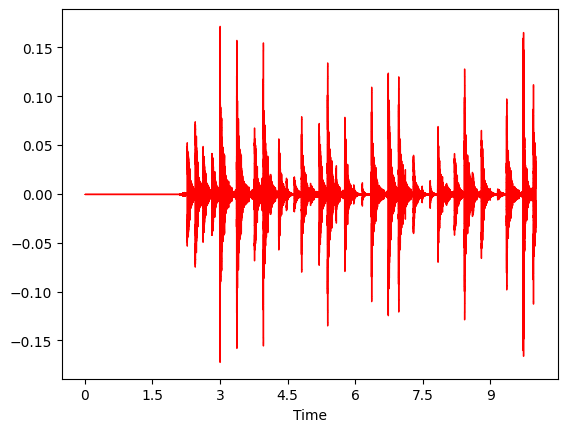

In [47]:
librosa.display.waveshow(y,sr=sr, x_axis='time', color='red')

In [18]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beats)

In [30]:
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(y, sr=sr, onset_envelope=o_env, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)

C:\Users\pdimo\AppData\Local\Temp\ipykernel_16704\2767606875.py:3: FutureWarning: Pass y=[ 0.0449211   0.04318263  0.03856697 ...  0.00047693  0.00021845
 -0.0003116 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_frames = librosa.onset.onset_detect(y, sr=sr, onset_envelope=o_env, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)


Spectrogram config

In [48]:
hop_length = 64
n_fft = 2048
bins_per_octave = 24
data = y
y_axis = "linear"
cmap = 'jet'
auto_aspect = False
stft = np.abs(librosa.stft(data, hop_length=hop_length, n_fft=n_fft))
D = librosa.amplitude_to_db(stft, ref=np.max)

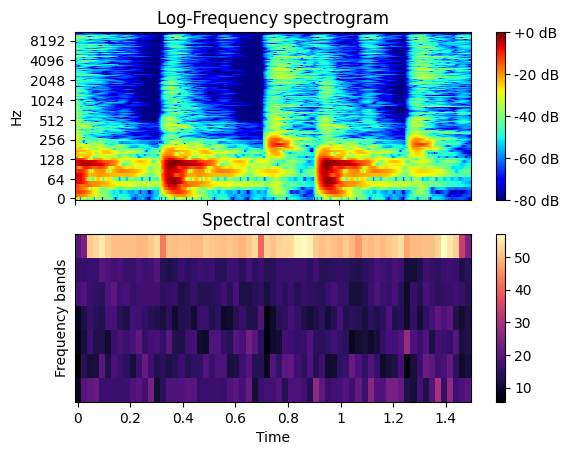

In [33]:
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
fig, ax = plt.subplots(nrows=2)
img1 = librosa.display.specshow(D, y_axis=y_axis, sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax[0], cmap=cmap, bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Log-Frequency spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

tick_interval = 0.2
loc = ticker.MultipleLocator(base=tick_interval)
ax[1].xaxis.set_major_locator(loc)
fig.colorbar(img2, ax=[ax[1]])

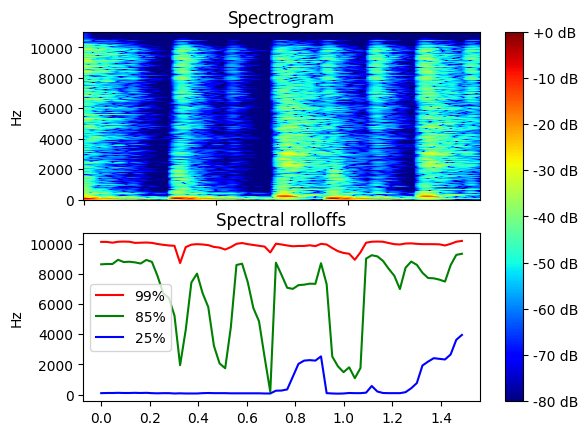

In [30]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff_mid = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.25)
fig, ax = plt.subplots(nrows=2)
img1 = librosa.display.specshow(D, y_axis=y_axis, sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax[0], cmap=cmap, bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)

ax[0].set(title='Spectrogram')
ax[0].label_outer()
ax[1].plot(librosa.times_like(rolloff), rolloff[0], color='red', label='99%')
ax[1].plot(librosa.times_like(rolloff_mid), rolloff_mid[0], color='green', label='85%')
ax[1].plot(librosa.times_like(rolloff_min), rolloff_min[0], color='blue', label='25%')
ax[1].set(title='Spectral rolloffs', ylabel='Hz')

tick_interval = 0.2
loc = ticker.MultipleLocator(base=tick_interval)
ax[1].xaxis.set_major_locator(loc)
fig.colorbar(img1, ax=ax, format='%+2.0f dB')
ax[1].legend()

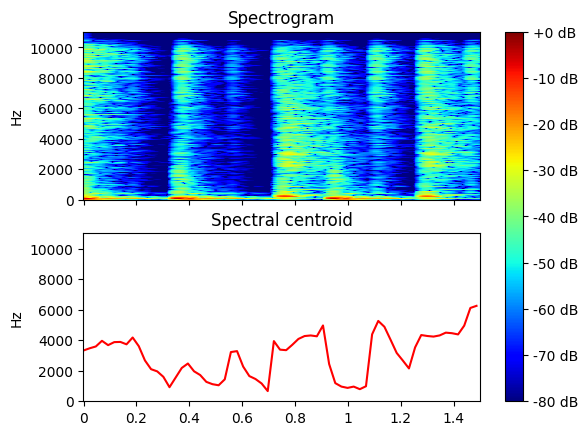

In [31]:
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(D, y_axis=y_axis, sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax[0], cmap=cmap, bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)

ax[0].set(title='Spectrogram')
ax[0].label_outer()
ax[1].plot(librosa.times_like(centroid), centroid[0], color='red')
ax[1].set_ylim([0, 11000])
ax[1].set(title='Spectral centroid', ylabel='Hz')

tick_interval = 0.2
loc = ticker.MultipleLocator(base=tick_interval)
ax[1].xaxis.set_major_locator(loc)
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

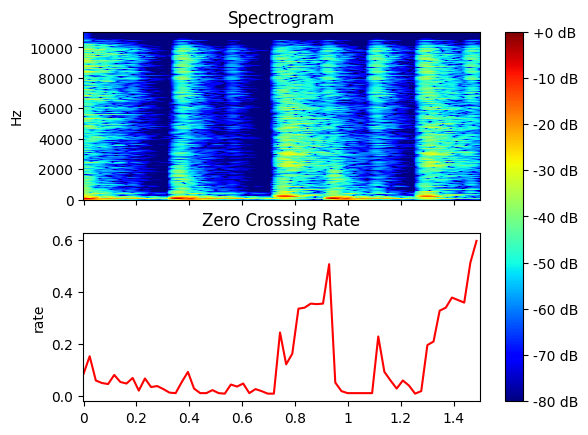

In [52]:
zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=512)
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(D, y_axis=y_axis, sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax[0], cmap=cmap, bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)

ax[0].set(title='Spectrogram')
ax[0].label_outer()
ax[1].plot(librosa.times_like(zcr), zcr[0], color='red')
ax[1].set(title='Zero Crossing Rate', ylabel='rate')

tick_interval = 0.2
loc = ticker.MultipleLocator(base=tick_interval)
ax[1].xaxis.set_major_locator(loc)
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

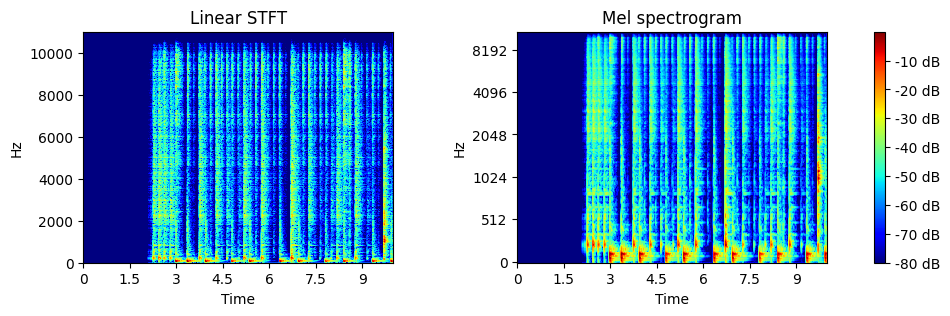

In [49]:
melspec = librosa.feature.melspectrogram(S=stft, n_fft=2048, hop_length=64, n_mels=256)
melspec_db = librosa.amplitude_to_db(melspec, ref=np.max)
fig, ax = plt.subplots(ncols=2, figsize=(12, 3), sharex=True)
img1 = librosa.display.specshow(D, y_axis=y_axis, sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax[0], cmap=cmap, bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)
img2 = librosa.display.specshow(melspec_db, y_axis="mel", sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax[1], cmap=cmap, bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)

ax[0].set(title='Linear STFT')
ax[0].label_outer()
ax[1].set(title='Mel spectrogram', ylabel='Hz')
plt.subplots_adjust(wspace=0.4)
#tick_interval = 0.2
#loc = ticker.MultipleLocator(base=tick_interval)
#ax[1].xaxis.set_major_locator(loc)
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

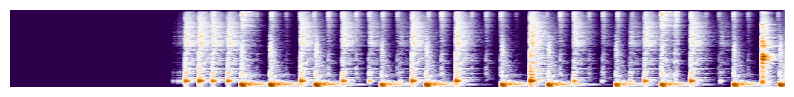

In [55]:
fig, ax = plt.subplots(figsize=(10, 1))
img2 = librosa.display.specshow(melspec_db, y_axis="mel", sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax, cmap="PuOr_r", bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)
plt.axis('off')
plt.savefig('spectrogram.png', dpi=300, bbox_inches='tight', pad_inches = 0)

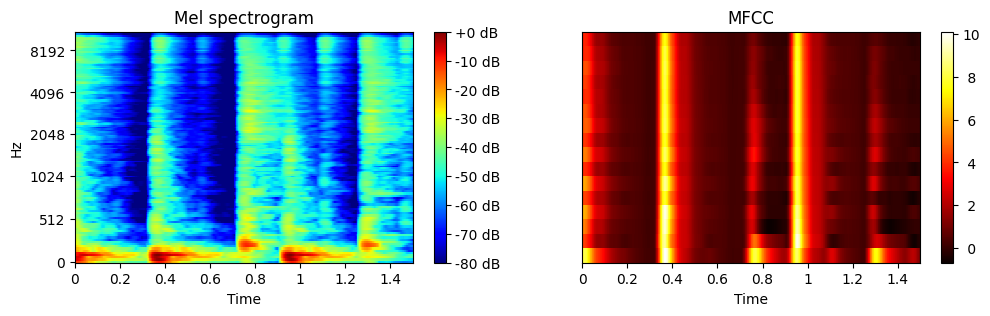

In [24]:
melspec = librosa.feature.melspectrogram(S=stft, n_fft=1024, hop_length=64)
mfcc = librosa.feature.mfcc(S=stft, n_mfcc=16)
melspec_db = librosa.amplitude_to_db(melspec, ref=np.max)
fig, ax = plt.subplots(ncols=2, figsize=(12, 3), sharex=True)
img1 = librosa.display.specshow(melspec_db, y_axis="mel", sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax[0], cmap=cmap, bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)
img2 = librosa.display.specshow(mfcc, sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax[1], cmap="hot", bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)

ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
ax[1].set(title='MFCC')
tick_interval = 0.2
loc = ticker.MultipleLocator(base=tick_interval)
ax[1].xaxis.set_major_locator(loc)
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
fig.colorbar(img2, ax=[ax[1]], format='%2.0f')

In [182]:
onset_slices = [round(x*sr) for x in onset_times]
audios = []

for x in onset_slices:
    audios.append(y[x:x+buffer])

In [183]:
onset_slices

[14848, 23040, 29696, 36864, 43520, 51200, 57856, 66048]

In [187]:
Audio(audios[6], rate=sr)